In [1]:
from autumn.tools.project import get_project
from autumn.settings import Region
from matplotlib import pyplot
from autumn.tools.plots.utils import REF_DATE
from autumn.tools.calibration.targets import get_target_series
import pandas as pd

In [2]:
project = get_project("covid_19", "victoria_2021")

In [3]:
model = project.run_baseline_model(project.param_set.baseline)

In [5]:
derived_df = model.get_derived_outputs_df()

# Service-level notifications

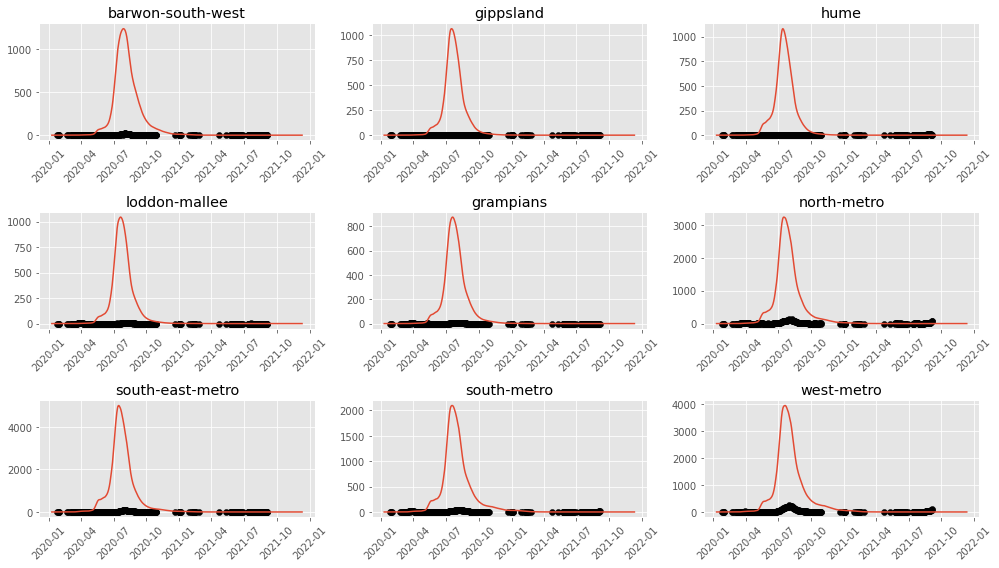

In [6]:
# Preparing
pyplot.style.use("ggplot")
fig = pyplot.figure(figsize=(14, 8))
for i_serv, service in enumerate(Region.VICTORIA_SUBREGIONS):
    
    # Collating data for plotting
    service_name = service.replace("-", "_")
    output = f"notifications_for_cluster_{service_name}"
    notif_dates, notif_values = get_target_series(project.calibration.targets, REF_DATE, output)
    
    # Plotting
    axis = fig.add_subplot(3, 3, i_serv + 1)
    axis.plot(derived_df[output])
    axis.scatter(notif_dates, notif_values, c="k")
    
    # Finishing up
    axis.set_title(service)
    pyplot.setp(axis.get_xticklabels(), rotation=45)
fig.tight_layout()

# Statewide indicators

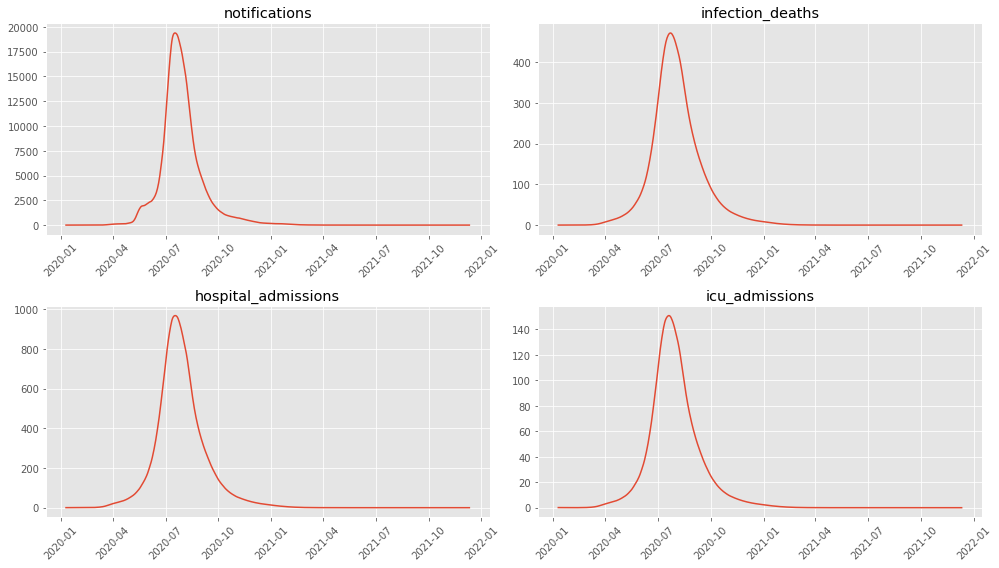

In [23]:
# Preparing
outputs_to_plot = ("notifications", "infection_deaths", "hospital_admissions", "icu_admissions")

pyplot.style.use("ggplot")
fig = pyplot.figure(figsize=(14, 8))
for i_out, output in enumerate(outputs_to_plot):
    
    # Plotting
    axis = fig.add_subplot(2, 2, i_out + 1)
    axis.plot(derived_df[output])
    
    try:
        target_dates, target_values = get_target_series(project.calibration.targets, REF_DATE, output)
        axis.scatter(notif_dates, notif_values, c="k")
    except:
        print(f"targets not available for {}"")
    
    # Finishing up
    axis.set_title(output)
    pyplot.setp(axis.get_xticklabels(), rotation=45)
fig.tight_layout()